In [8]:
import os

# List all files in the input directory
input_dir = '/kaggle/input'
file_names = os.listdir(input_dir)
print(file_names)


['leapgestrecog']


In [9]:
import os

# Define the path to the directory containing the data
data_dir = '/kaggle/input/leapgestrecog'



In [10]:
import os
from random import randint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import models, layers
from keras.optimizers import Adam
from keras.utils import to_categorical

%matplotlib inline

In [11]:
lookup_dict = {}
reverse_lookup_dict = {}
count = 0
for subdir in os.listdir('/kaggle/input/leapgestrecog/leapGestRecog/00'):
    lookup_dict[subdir] = count
    reverse_lookup_dict[count] = subdir
    count+=1
lookup_dict

{'02_l': 0,
 '04_fist_moved': 1,
 '09_c': 2,
 '10_down': 3,
 '06_index': 4,
 '08_palm_moved': 5,
 '07_ok': 6,
 '05_thumb': 7,
 '01_palm': 8,
 '03_fist': 9}

In [13]:
X = []
y = []
datacount = 0
for i in range(0, 10):
    for j in os.listdir('/kaggle/input/leapgestrecog/leapGestRecog/0' + str(i)):
        count = 0
        for k in os.listdir('/kaggle/input/leapgestrecog/leapGestRecog/0' + str(i) + '/' + j):
            img = Image.open('/kaggle/input/leapgestrecog/leapGestRecog/0' + str(i) + '/' + j + '/' + k).convert('L')  # grayscale image
            img = img.resize((150, 150))
            arr = np.array(img)
            X.append(arr)
            count = count + 1
        y_values = np.full((count, 1), lookup_dict[j]) 
        y.append(y_values)
        datacount = datacount + count
X = np.array(X, dtype="float32")
y = np.array(y)
y = y.reshape(datacount, 1)

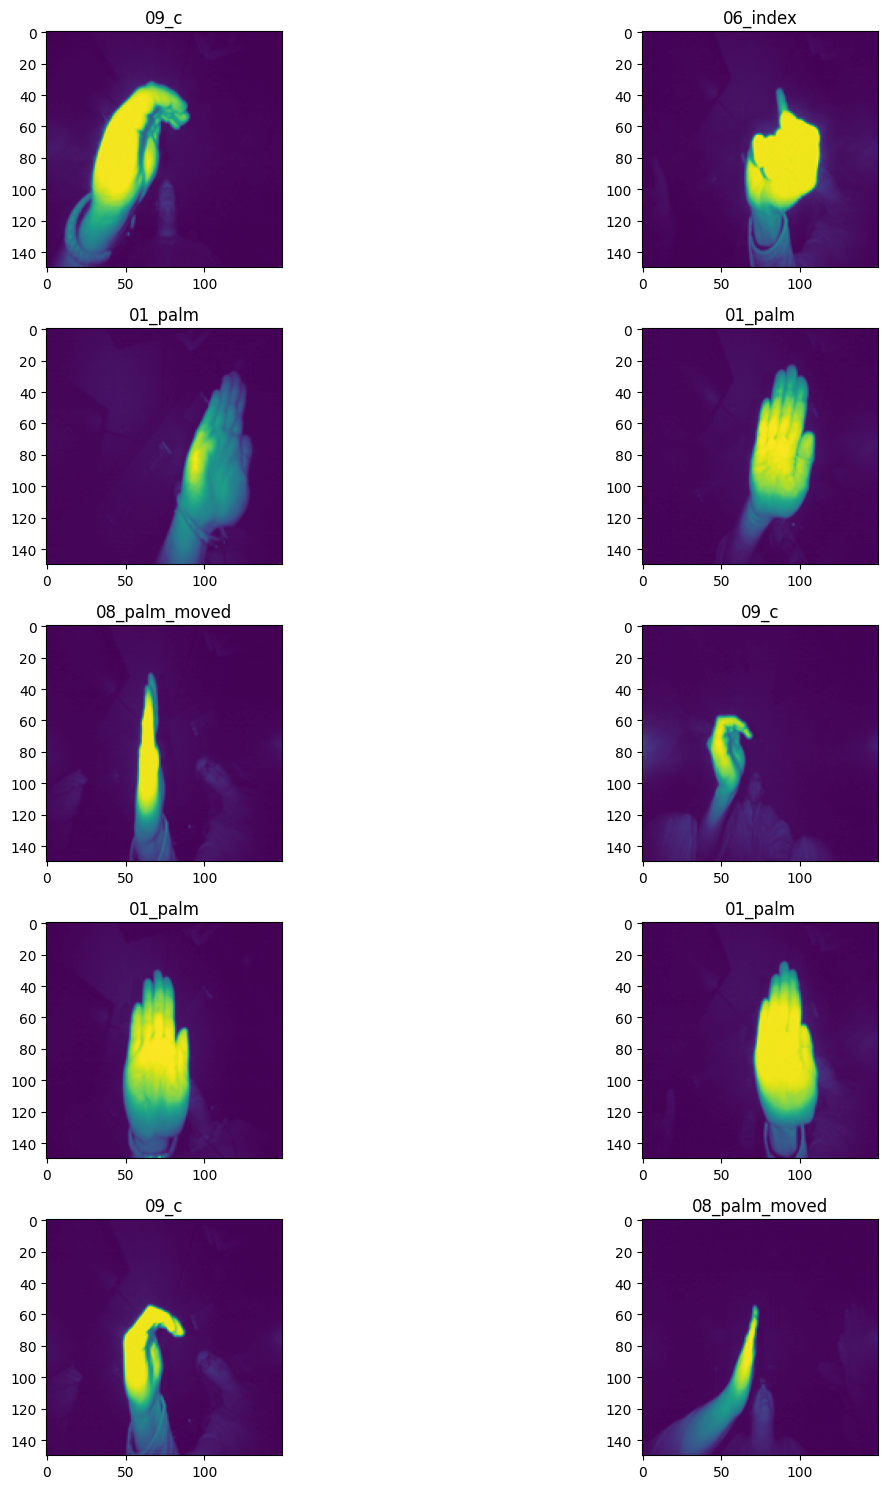

In [14]:
fig,ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)
for i in range(5):
    for j in range (2):
        l = randint(0,len(y))
        ax[i, j].imshow(X[l])
        ax[i, j].set_title(reverse_lookup_dict[y[l, 0]])
        
plt.tight_layout()

In [15]:
y = to_categorical(y)
X = X.reshape((datacount, 150, 150, 1))
X /= 255

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding="Same", activation="relu", input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding="Same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))) 

model.add(layers.Conv2D(filters=96, kernel_size=(3,3), padding="Same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Conv2D(filters=96, kernel_size=(3,3), padding="Same", activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation("relu"))
model.add(layers.Dense(10, activation="softmax"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [18]:
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)

learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1,
    mode='auto'
)

callbacks = [earlystop, learning_rate_reduction]

In [19]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 96)     │        83,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7776)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,981,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,144,714 (15.81 MB)

 Trainable params: 4,144,714 (15.81 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 496s 4s/step - accuracy: 0.7025 - loss: 0.8478 - val_accuracy: 0.9988 - val_loss: 0.0061 - learning_rate: 0.0010
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 497s 4s/step - accuracy: 0.9976 - loss: 0.0077 - val_accuracy: 0.9976 - val_loss: 0.0062 - learning_rate: 0.0010
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 497s 4s/step - accuracy: 0.9974 - loss: 0.0083 - val_accuracy: 0.9996 - val_loss: 0.0019 - learning_rate: 0.0010
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 459s 4s/step - accuracy: 0.9997 - loss: 9.1708e-04 - val_accuracy: 0.9998 - val_loss: 6.8439e-04 - learning_rate: 0.0010
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 461s 4s/step - accuracy: 1.0000 - loss: 1.2308e-05 - val_accuracy: 0.9998 - val_loss: 6.7657e-04 - learning_rate: 0.0010
Epoch 7/10
107/118 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 1.0000 - loss: 4.7755e-06
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
118/118 ━━━━━━━━━━━━━━━━━━━━ 457s 4s/step - accuracy

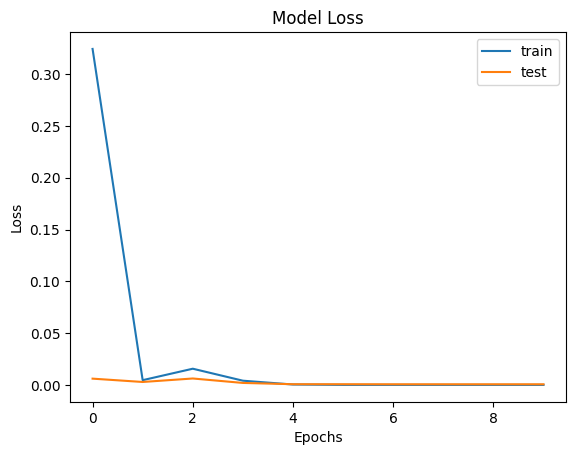

In [22]:


plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()



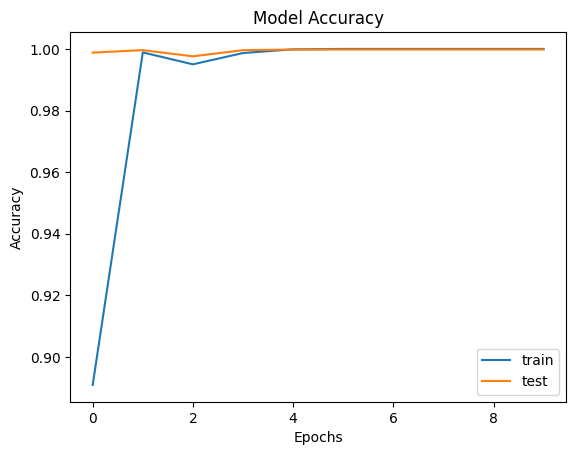

In [23]:


plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

